### Import Packages

In [89]:
import glob  # OS dependencies to get file system details

import cv2
#importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Read list of images with different colour channels

In [90]:
def show_images(images, gray=None):
    """
    This is an utility function to show multiple images with different colour maps

    :param images - An images list
    :param gray - A flag to set default value for matplotlib imshow colour map. If the image
                  shape is 2( i.e binary image) then cmap value will be "gray"
    :return: Nothing
    """
    rows = (len(images)+1)//2
    plt.figure(figsize=(11, 11))
    for idx, img in enumerate(images):
        plt.subplot(rows, 2, idx+1)
        # if the image is binary then it'll be printed as grayscale, otherwise colour map
        # will be ignored
        plt.imshow(img, cmap="gray" if len(img.shape) == 2 else gray)
        plt.xticks([])
        plt.yticks([])

    plt.show()

##### Let's test the show_images function

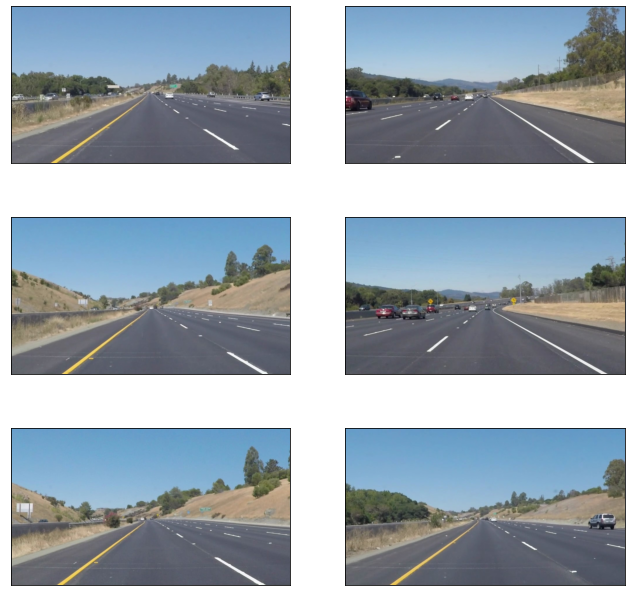

In [91]:
# Loading test images from test_image directory
test_images = [plt.imread(path) for path in glob.glob("test_images/*")]
# Visualize images
show_images(test_images)

Lines are yellow and white, some are dotted lines. Dotted lines need to be detected as a single line. Images were loaded as RGB spaces.

#### Select yellow and white colours from given test images
##### OpenCV cv.inRange function can be used to filter image spaces and
[RGB color picker](https://www.rapidtables.com/web/color/RGB_Color.html)

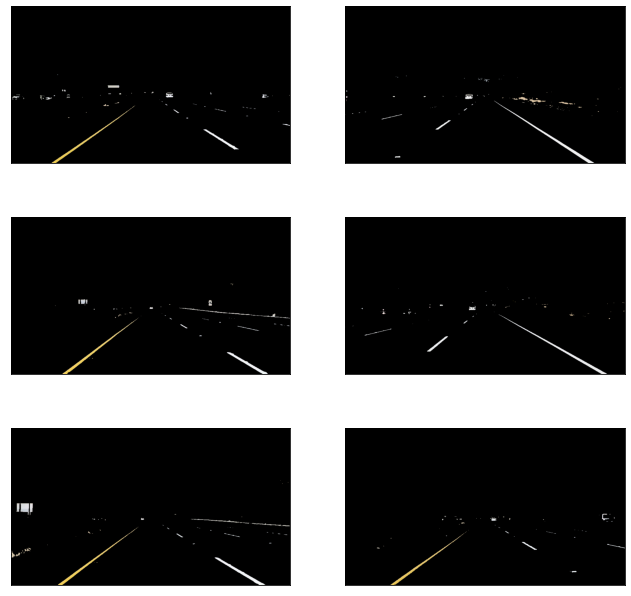

In [92]:
def select_rgb_white_yellow(img):
    # white mask
    lower_bound = np.uint8([220,220,220])
    upper_bound = np.uint8([255,255,255])
    w_mask = cv2.inRange(img, lower_bound, upper_bound)

    # yellow masked
    lower_bound = np.uint8([190, 190,0])
    y_mask = cv2.inRange(img, lower_bound, upper_bound)

    # merge the masks
    mask = cv2.bitwise_or(w_mask, y_mask)
    return cv2.bitwise_and(img, img,mask=mask)

show_images(list(map(select_rgb_white_yellow, test_images)))